# Hlab analysis methods handbook
Welcome! This rather lengthy document summarizes the various topics we will/have covered in the HLab analysis mini series. If this is the .ipynb version of the doc, you can edit/run blocks of code yourself (assuming you have Julia and the necessary packages installed). Otherwise, you can open a new Julia session and follow along with the code examples below

## Table of contents
0. [Basic Setup](#basics)
1. [Linear Algbera](#linalg)<br>
    1.1 [Vector Norms](#norm)<br>
    1.2 [Inner Product](#inner)<br>
    1.3 [Outer Product](#outer)<br>
    1.4 [Matrix Rank](#rank)
2. [Signal Processing](#sigproc)<br>
    2.1 [Convolution](#conv)<br>
    2.2 [Fourier Transformation](#fourier)<br>
    2.3 [Wavelet Transformation](#wavelet)<br>
    2.4 [Event Detection](#event_detect)<br>
    2.5 [Time Series Modeling](#ts_modeling)<br>
    2.6 [Signal Decomposition and Reconstruction](#signal_decomp)<br>
    2.7 [Image Filtering & ROI](#image_roi)<br>

# 0 - Basic Setup <a name="basics"></a>
If you are new to Julia, fear not, it is quite similar to MATLAB. There are, however a few peculiarities to take care of. First, in Julia we need to *import* packages to use certain functions. For instance, there are no built-in plotting functions, but there is a handy _Plots_ package that we can install and use. In general, to increase the flexibility of Julia we first need to (a) install desired packages, and (b) import them when we wish to use them. 

For the most part, Julia code will look very familiar if you have learned Python and/or MATLAB (it uses the best of both worlds: MATLAB's intuitive linear algebra framework with Python's general-purposeness & modularity). Plotting is a bit different, as are some of the data structures (for instance, a row-vector does not behave the same as a column-vector, but we'll get into that next)

For now, we will need to install at least a few additional packages to get up to speed. If you haven't already, in an active Julia session (or in this notebook if you are using it in Jupyter) type the following commands to get plotting, statistics, and tabular-based data structures available for use:

In [ ]:
using Pkg # allows us to add new packages
Pkg.update()
Pkg.add("Plots")      # plotting capabilities
Pkg.add("StatsPlots") # statsitics-related plotting add ons 
Pkg.add("DataFrames") # tabular data structures

We can use these packages once installed via the `using __package_name__` command, which imports all the functions available from that particular package. Contrastingly, importing via the `import __package_name__` imports the package, but you have to use dot (.) notation to access the functions. 

Personally, I prefer the `using` command for packages that you will almost certainly use throughout your code (for instance the `Plots` package), and the `import` command for packages that will be used more rarely. This can help you keep track of which functions stem from which packages, and IMO keeps the code looking cleaner.

[0.15135, 0.932274]

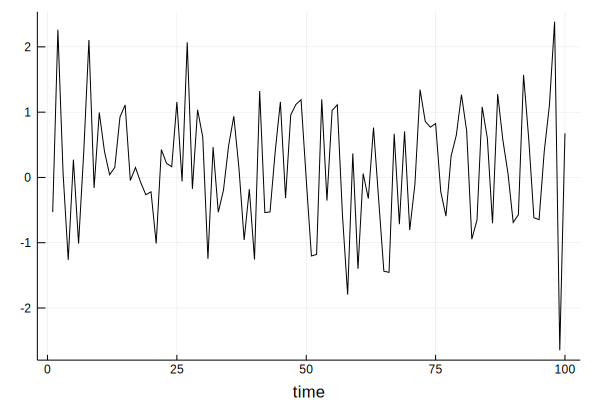

In [30]:
using Plots
import Statistics

x = randn(100)
print([Statistics.mean(x), Statistics.std(x)])
plot(x, label="", color=:black, xlabel="time")

# 1 - Linear Algebra <a name="linalg"></a>
Linear algbera is at the core of most (if not all) of the analysis methods we will be covering. As such, knowing even a very surface-level amount of linear algebra can be extremely rewarding/beneficial when creating your analysis pipelines.

Let's begin by creating a simple *vector* in Julia, which is defined as a column-vector by default:

In [38]:
x = [1, 2, 3, 4, 5] # unlike matlab, you must use commas if you want to specify a column vector
x2 = [1 2 3 4 5]
print("size of x: ", size(x), "\n")
print("size of x2: ", size(x2))

size of x: (5,)
size of x2: (1, 5)

We see that our variable `x` is a 5 x 1 column vector. This is an important thing to note, since linear algebra cares about the orientation of vectors/matrices. Of course, we can do simple things like add/multiply a scalar. We can also add another vector of the same length, or multiply by another vector or matrix. 

In [40]:
y = [0, 1, 0, 1, 2]
print("x + y: ", 2x, "\n") # multiply each element by 2
print("x × y: ", x .* y) # element-wise multiplication

x + y: [2, 4, 6, 8, 10]
x × y: [0, 2, 0, 4, 10]

### 1.1 - Vector and matrix norms <a name="norm"></a>
We can make some measurements on vectors and matrices that can come in handy for things such as scaling data (useful/necessary for some matrix factorization and clustering techniques) and analyzing goodness-of-fit for regression problems.

The _norm_ of a vector is defined as:
$$\left|\left|v\right|\right|^{p} = \sum{v_i^p}$$<br>

So the _2-norm_ of a vector is the _sum-of-squares_ (because p -> 2). The norm of a matrix is the same thing except that we sum elements over both rows and columns. 

Norms come in handy for scaling data (divide each vector by its norm), which can improve clustering/dimensionality reduction techniques since all variables (column of a matrix) become similar in magnitude, and thus no single variable dominates the clustering/dimensionality reduction solution. Moreover, the _2-norm_ (also called the _L2 norm_) is used in regression. The term _least squares_ comes directly from trying to minimize the _L2 norm_ of the residuals following a regression fit (i.e. minimize the _sum of squares_ of the errors). 

### 1.2 - The inner product <a name="inner"></a>
We can think of the _L2 norm_ as an _inner product_ (or _dot product_) of a vector with itself. An inner product between vectors `x` and `y` is defined as the sum of element-wise products. 

For instance, given vectors `x` and `y`, the dot product is:
$$x^Ty$$

From above, you can see that I had to transpose the vector `x` first for this to work. I also could have imported the `LinearAlgebra` package and used the function `LinearAlgebra.dot(x, y)`. 

We can write our own dot-product function to clarify what it is doing:

In [44]:
dot(x, y) = sum([x[i]*y[i] for i in eachindex(x)]) 
print(x' * y, "\n") # built-in dot product
print(dot(x, y))    # homemade dot product

16
16

So the inner/dot product is nothing more than summing the resulting vector after doing element wise multiplication. If we have a matrix-vector product or matrix-matrix product, we simply repeat the above procedure for each row/column of the matrices involved. 

Inner products depend on a certain order, so if we have two matrices `A` and `B`, the inner product `A * B` is not the same as `B * A`. The former performs a dot product between each _row of A_ and each _column of B_, while the latter does the opposite. 

Inner products are at the core of much of linear algebra, and indeed many of the analyses we will cover. It can be interpreted in a variety of ways, some of which are more useful than others depending on the context:

1. A similarity score (clustering)
2. A projection of one vector/matrix onto another (dim reduction methods, discriminant analysis)
3. A weighted mixture (demixture) of factors (observations) (factor analysis, PCA) 
4. A weighted sum of predictor variables (regression)
5. A rotation/scaling of data (variety of signal/image processing methods)
6. A filter response (signal processing/convolution)
7. A transformation of _inputs_ into _outputs_ (variety of topics/methods, such as neural networks)

I usually find the inner product easiest to think of in terms of (1), (3), and/or (4), as these are likely to be encountered in your analysis, but it can be useful to visualize/interpret inner products as transformations of vectors/variables:

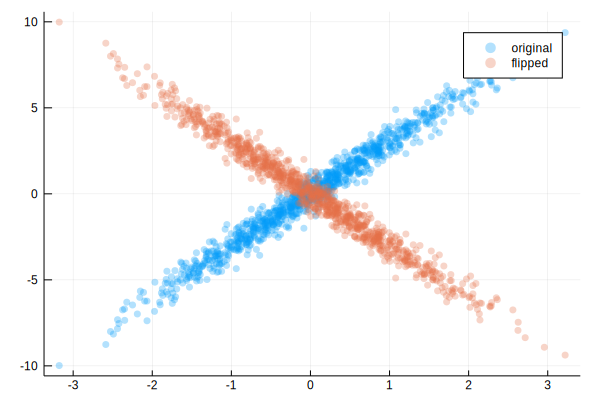

In [233]:
# create a correlated scatter plot
x = randn(1000)
y = 3x + 0.5*randn(1000) 
data = hcat(x, y)

# now lets flip over the y-axis using an inner product with a rotation matrix
A = [1 0; 0 -1]
data_flipped = data * A

scatter(x, y, label="original", alpha=0.3, markerstrokewidth=0)
scatter!(data_flipped[:,1], data_flipped[:,2], label="flipped", alpha=0.3, markerstrokewidth=0) 

As you can see above, we have used the inner product in a _rotation/transformation_ setting, where we've flipped our data about the y-axis. It is helpful to understand the structure of `A`, and what it is doing to each of our original _dimensions_ (each column of `data`). Our rotation matrix `A` contains the values: 
```
1  0
0 -1
```
Each _row_ of `A` is associated with one dimension/feature/variable of the _input_ data, while each _column_ of `A` is associated with one dimension/feature/variable of the _ouput_ data. Since we have two columns in `data`, and two columns in `A`, we already know that this inner product is NOT going to change the dimensionality of the data. We started with two variables (x, y), and we will be ending with two variables (x_new, y_new). 

Looking at the _columns_ of A, we see that the first column, `[1, 0]`, will be multiplying the _first_ variable in `data` (x) by the value **1**, and the _second_ variable in `data` (y) by the value **0**, then adding the results together to produce `x_new`. Since we are not combining `x` and `y` together (since y is multiplied by 0), and since we are only multiplying `x` by 1, we know that `x_new = x`. 

Similarly, the second column of `A`, `[0, -1]`, will be multiplying `x` by **0**, and `y` by **-1**, then summing the results to produce `y_new`. Since the only contribution to `y_new` is the original `y` variable in `data`, and it is only multiplied by **-1**, we know that `y_new = -y`.

So in general, each _column_ of `A` specifies how the input variables get weighted before being summed together to produce a new, single, ouput variable. So each column of `A` is performing a _linear combination_ of the input variables. We can also readily appreciate how we can easily shrink or expand the original dimensionality of the data set (by removing or adding columns to `A`, respectively). In fact, this last point is somewhat the point of dimensionality reduction techniques where we _project_ data onto fewer dimensions.

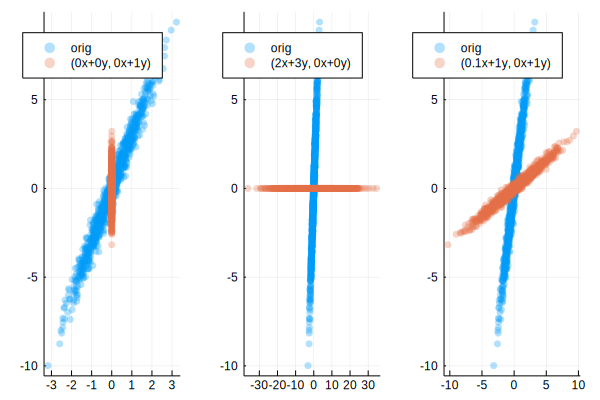

In [246]:
# let's project the data onto different subspaces. Note a "subspace" is just
# a new coordinate system with less than or equal to the # of dimensions in the 
# original coordinate system

A_y = [0 1; 0 0] # only keep 2nd column (y) of data
A_xy = [2 0; 3 0] # project onto a subspace consisting of 2x + 3y
A_xy2 = [0.1 1; 1 0] # make new x-variable consisting of 3x + 2y; keep the y-variable the same

data_y = data * A_y
data_xy = data * A_xy
data_xy2 = data * A_xy2

p1 = scatter(data[:,1], data[:,2], alpha=0.3, markerstrokewidth=0, label="orig" )
scatter!(data_y[:,1], data_y[:,2], alpha=0.3, markerstrokewidth=0, label="(0x+0y, 0x+1y)")
p2 = scatter(data[:,1], data[:,2], alpha=0.3, markerstrokewidth=0, label="orig" )
scatter!(data_xy[:,1], data_xy[:,2], alpha=0.3, markerstrokewidth=0, label="(2x+3y, 0x+0y)")
p3 = scatter(data[:,1], data[:,2], alpha=0.3, markerstrokewidth=0, label="orig")
scatter!(data_xy2[:,1], data_xy2[:,2], alpha=0.3, markerstrokewidth=0, label="(0.1x+1y, 0x+1y)")

plot(p1, p2, p3, layout = @layout [a b c])

### 1.3 - The outer product <a name="outer"></a>
Unlike the inner product, which typically reduces the # of elements (for instance, from two vectors -> scalar), the outer product is an _expansion_ of a dataset. You will likely not use an outer product as often as you will an inner product, but it has important applications, especially relating to dimensionality reduction techniques and data reconstruction. 

If we have two column vectors `x` and `y`, we perform an outer product as `x * y'`. Note that while we transposed `x` for an inner product, here we have transposed `y`. The result is that we take the vector `x`, and multiply all of its elements by each element in `y`. Basically, we are simply copying the vector `x` many times, and scaling each copy depending on the value of each element in `y`. The result is a matrix that just contains scaled copies of `x`.

It is easer to understand this operation with a quick example:

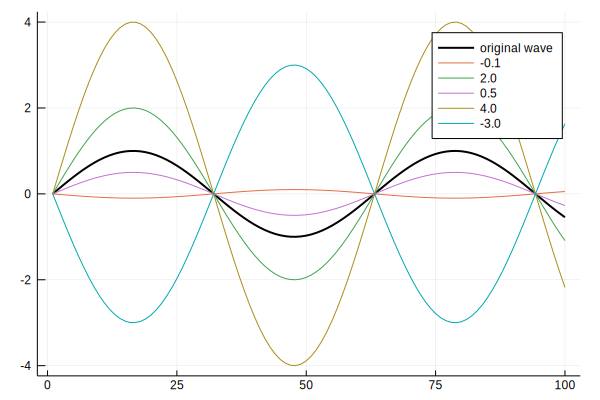

In [75]:
x = sin.(range(0, stop=10, length=100)) # sine wave 100 pts long
w = [-0.1, 2, 0.5, 4, -3] # weights for each "copy" of x

M = x * w' # now this is of size 100 x 5, since x was 100 x 1 and w' is 1 x 5

p = plot(x, color=:black, linewidth=2, label="original wave")
plot!(M, label=w)

As you can see, each column in `M` is simply `x` that has been scaled according to the corresponding element in `w`. Even though we have 5 columns in `M`, really each column can be represented as the original sine wave with a scaling, so that the matrix `M` is actually a very simple matrix (with `rank = 1` ... more on that below). 

This application comes up when we use dimensionality reduction techniques like PCA, and wish to get a _reconstruction_ of our original data using some (or all) of the principal components. The idea is that we can decompose our data matrices into a bunch of "simple" factors and reconstruct the data by performing outer products using the factors and summing the result.

### 1.4 - Matrix rank <a name="rank"></a>
As an explicit example of the above, lets demonstrate how we can build a rather complex looking dataset using just a few simple functions and some outer products. This is a toy example that demonstrates the way one may reconstruct data from principal components etc.

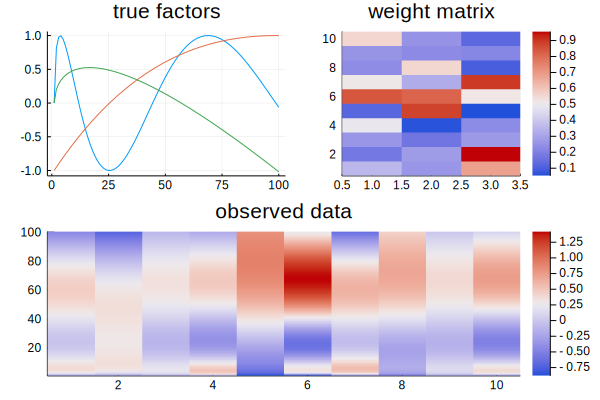

In [248]:
# build our functions
f1(x) = sin.(3x.^0.5)
f2(x) = -cos.(x.^0.5)
f3(x) = -0.5x + x.^0.6

# create our "true" simple functions. Each one may, for instance, represent a discovered
# "factor" from a dataset that expalains a good amount of variability in the data (a la PCA)
x = range(0, stop=10, length=100)
factors = [f1(x) f2(x) f3(x)] # 100 x 3 matrix

# create our "weights", which determine how we the simple functions
# are scaled for each of our "measurements" that we made
weights = rand(10, 3) # each factor will be scaled randomly 10 times; the 10 here could represent 10 different measurements or cells or something

# produce the full, observed dataset by scaling the factors with the weights
data = factors * weights'
p1 = plot(factors, title="true factors", label="")
p2 = heatmap(weights, color=:coolwarm, title="weight matrix")
p3 = heatmap(data, color=:coolwarm, title="observed data")
plot(p1, p2, p3, layout = @layout [a b; c])

What we have done above is taken an _outer product_ of our true factors with a weighting matrix. However, we can break this done as a _sum of outer products_, where each factor gets scalled randomly via an outer product with a weight vector, then the resulting matrices are all summed together:

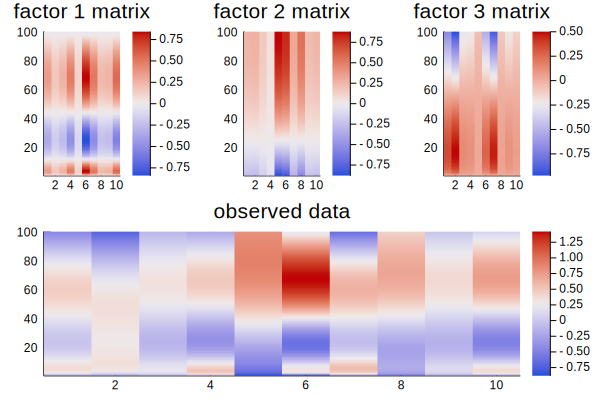

In [250]:
data_1 = factors[:,1] * weights[:,1]' # outer product of factor 1 with weights for factor 1
data_2 = factors[:,2] * weights[:,2]' # ditto, for factor 2
data_3 = factors[:,3] * weights[:,3]' # ditto, for factor 3
data_outer = data_1 + data_2 + data_3

p1 = heatmap(data_1, color=:coolwarm, title="factor 1 matrix")
p2 = heatmap(data_2, color=:coolwarm, title="factor 2 matrix")
p3 = heatmap(data_3, color=:coolwarm, title="factor 3 matrix")
p4 = heatmap(data_outer, color=:coolwarm, title="observed data")
plot(p1, p2, p3, p4, layout = @layout [a b c; d])

So as you can see from above, performing an outer product for each factor with its weight vector and summing the result is equivalent to taking a weighted linear combination for each element across the factors. The former is just a longer way of doing the latter. Ultimately, both produce a rather complicated looking matrix, while in reality it is simply composed of three simple functions that have been scaled slightly differently across "measurements" and summed together. The benefit of the more explicit outer-product-summation based method is that we can observe what each factor matrix looks like and see that in reality it is just a repeat of a simple function.

The three factor matrices above all have a *rank* equal to **1**. The *rank* of a matrix tells us how many _independent columns_ it contains. Independence here means that, if we imagine each column representing some vector pointing in some direction, independent vectors (columns) are those that make up a unique (hyper)plane. So all of our factor matrices above have rank 1 because the columns are all simply scaled versions of one another. So, in vector space, all the vectors (columns) are lying on top of one another (pointing in the same direction).

In contrast, our final observed matrix `data` has *rank* equal to **3**, because it is composed of three independent factors. However, if we had instead made one of the factors simply a copy (maybe scaled) of one of the other factors, then we would have reduced the rank of `data` to **2**. The point of many dimensionality reduction techniques is to find a _low-rank_ approximation to a dataset under the assumption that the original data may have high rank due to _noise_.  

# 2 - Statistical Signal Processing <a name="sigproc"></a>
The term "signal processing" encompasses a huge number of methods. In the HLab / neurophys labs, we will primarily be acquiring time-series data, perhaps of mixed types (e.g. calcium imaging, _in vitro_ and _in vivo_ electrophysiology, and even behavior). The methods we'll talk about below don't just apply to time-series type data, but can be used in a wide variety of settings.

There is perhaps a slight nuance to the adjective "statistical" when we talk about signal processing. Without it, we assume that our signals are _deterministic_ (that is, 100% reproducible given the same initial conditions). In reality, the data we collect has noise, both measurement- and biologically-based. By viewing our signals in a statistical framework, we can use methods developed for _stochastic processes_ (random processes) to model/infer the true "sources" of our signals.

### 2.1 - Convolution <a name="conv"></a>
At the heart of many signal/image processing tools is the convolution. It can be interpreted as a filtering of one signal with another (called the kernel), a transformation of the input data, a similarity score over time between two signals, or a re-weighting of points with a weighting kernel. 

Mathematically, given two signals (or functions of time) **F(t)** and **G(t)**, the convolution is defined as:
$$F(t) * G(t) = \int_{-\infty}^{\infty}{F(\tau)G(t-\tau)dt}$$

We always work with discrete signals in our experiments, so the convolution becomes:
$$\sum_{t=-\infty}^{\infty}{F(\tau)G(t-\tau)}$$

Boiled down, a convolution means we slide one of our signals, **G(t)** over the other, **F(t)**, and compute the _dot product_ between them at each time point. If they perfectly overlap, then the convolution for that particular time point will be maximal; if they do not overlap at all, or if the signals are _orthogonal_ at a particular time point, the convolution produces the value 0. Since the dot product at each time point produces a single value, each value of result of the convolution is a weighted sum of many points in **F(t)**, weighted by **G(t)**.

It's helpful to see some visualization of this; the [wikipedia article](https://en.wikipedia.org/wiki/Convolution) has some nice examples. Most high-level languages (MATLAB/Julia/Python) allow convolutions to be easily performed:

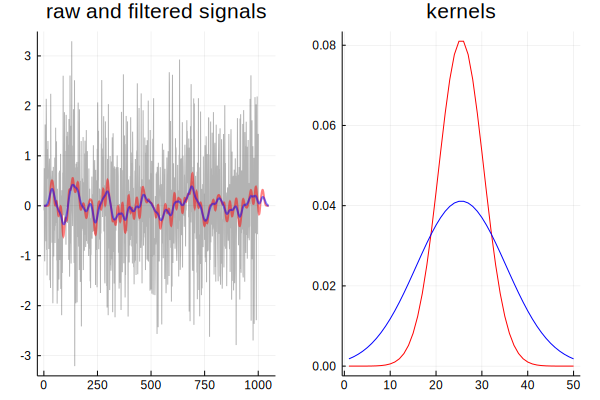

In [231]:
import DSP # digitial signal processing package...add via Pkg.add("DSP") if you don't have it already
using Plots

F = randn(1000) # gaussian white noise
G1 = DSP.gaussian(50, 0.1) # make a gaussian kernel
G2 = DSP.gaussian(50, 0.2) # a wider gaussian
G1 /= sum(G1) # normalize
G2 /= sum(G2) # ditto

H1 = DSP.conv(F, G1) 
H2 = DSP.conv(F, G2)

p1 = plot(F, color=:black, label="", alpha=0.3, title="raw and filtered signals")
plot!(H1, color=:red, label="", linewidth=2, alpha=0.5)
plot!(H2, color=:blue, label="", linewidth=2, alpha=0.5)

p2 = plot(G1, color=:red, label="", title="kernels")
plot!(G2, color=:blue, label="")

plot(p1, p2, layout = @layout [a b])

Note that convolution is equivalent to our more common understanding of _filtering_. Using the convolution, we've filtered for certain frequencies by taking weighted sums of neighboring points. In the case of the gaussian kernel above, we've selected for lower-frequency components since each resulting time point is a weighted average of the original points centered on the selected time point. If we had chosen a kernel that displays rapidly oscillating/periodic behavior, our filter would have selected for higher frequency components.

### 2.2 - Fourier Transform <a name="fourier"></a>
The Fourier Transform (FT) is perhaps as pervasive in the signal-processing world as is the convolution. It is at the heart of most algorithms for filtering, spectral-estimation, image processing, circuit design, ... the list goes on. 

The FT is a linear mapping of a signal into the frequency-domain. It asks: _what are the frequencies and their phases, that, when combined with appropriate weights, reconstruct the signal._ It is given by the equation:
$$F(\omega) = \sum_{t=1}^{T}{x(t)e^{-2i \pi t \omega T^{-1}}}$$

Breaking this down, we are weighting each data point `x(t)` by the weight given by that rather complicated looking exponential. The exponential comes from Euler's formula:
$$e^{ix} = cos(x) + isin(x)$$. 

For the FT, the `x` in Euler's formula equals everything minus the `i`. If we substitute Euler's formula into the FT, we see:
$$F(\omega) = \sum_{t=1}^{T}{x(t) \times \left[cos(-2 \pi t \omega T^{-1}) + isin(-2 \pi t \omega T^{-1})\right]}$$

So the FT is multiplying each data point `x(t)` by a a complex wave (a real cosine wave with a particular frequency and a complex sine wave with that same frequency), and summing the results together. In other words, it is taking the **dot product** between `x(t)` and that complex wave. The result of this dot product is a single (complex) value that is stored into `F(w)`. The larger the magintude of that value, the more "similar" the signal `x(t)` is with that particular wave. It then increases the frequency by 1 unit (the unit depends on your sampling rate), and repeats.

By making the sine wave imaginary, the FT is able to gather the phase of that wave relative to the signal. If you picture the value of the complex wave at each point **t** as a vector pointing in 2D, where the y-axis is the imaginary line, and the x-axis is the real line, the **angle** of the vector tells us how similar `x(t)` is with `isin(t)` and `cos(t)`. For instance, if the real part of that value is 0, and the imaginary part is positive, then we know the phase must be 90 degrees since `cos(pi/4) = 0` and `isin(pi/4) = i1`. The [norm](#norm) of the vector tells us how "big" that particular component (frequency) is in the signal. 

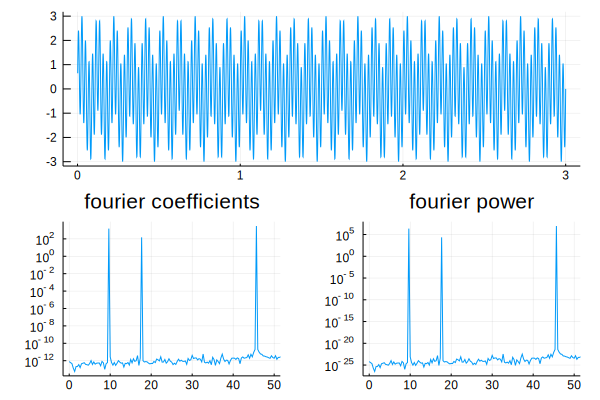

In [125]:
# here is a simple example of the (inefficient) Fourier Transform. Rather than explicitly looping
# over each frequency ω, we simply build a weight matrix by taking the outer product
# of 1:Ω and our time vector 1:T, where Ω is the max frequency

using LinearAlgebra, Plots

function fourier(X)
    # computes a discrete fourier transform of X:
    #   F(ω) = sum_t(X(t) * e^(-2πiωt / T))

    T = length(X)
    t = range(1, stop=T)
    ω = t' # frequencies are increased with the length of X
    weights = exp.(-2π * im * (t * ω) / T) # outer product of n & ω
    return weights * X
end


function plot_fourier(x, fs, xlim=[0, 100])
    # computes and plots the fourier transform of x
    
    T = Int(floor(length(x)/2))
    dt = 1/fs
    t = range(dt, stop=T*2*dt, step=dt)
    F = fourier(x)
    frequencies = LinRange(0, fs/2, T+1)
    
    p1 = plot(t, x, label="")
    p2 = plot(frequencies, norm.(F[1:T+1]), label="", xlim=xlim, yaxis=:log, title="fourier coefficients")
    p3 = plot(frequencies, norm.(F[1:T+1]).^2, label="", xlim=xlim, yaxis=:log, title="fourier power")
    plot(p1, p2, p3, layout = @layout [a; b c])
end

Fs = 1000
t = range(1/Fs, stop=3, step=1/Fs)
x = sin.(2π * 10 * t) + 2sin.(2π * 46 * t) + 0.1sin.(2π * 18 * t)
plot_fourier(x, Fs, [0, 50])

Note that we can reconstruct a signal by removing (setting to 0) some of the coefficients in the Fourier response, then taking the _Inverse Fourier Transform (iFT)_ of the result. In fact, this is exactly what a convolution/filter does: a convolution of a signal with another is the same as direct multiplication of their Fourier responses, followed by an iFT!

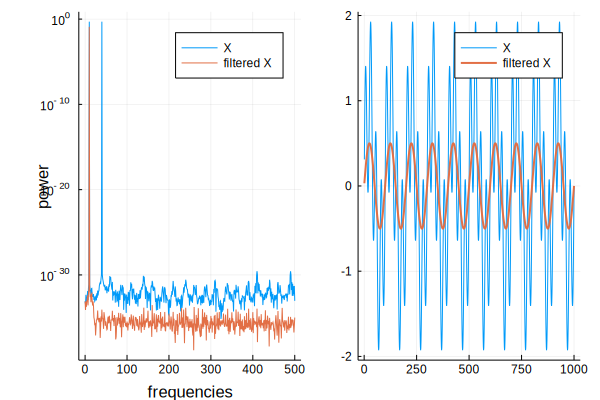

In [226]:
import DSP

function remove_freq(X, Fs, freq)
    # filters the signal in X by removing a desired frequency
    # and anything above it, then inverse fourier transforming
    N = length(X)
    frequencies = LinRange(0, Fs/2, N)
    F_x = DSP.fft(X) 
    ind = argmin(abs.(frequencies .- freq)) # find nearest frequency location
    
    # remove anything below/above that frequency and inverse FT
    F_x[ind:end] .= 0
    Z = real(DSP.ifft(F_x))
        
    P_x = DSP.periodogram(X, fs=Fs)
    P_z = DSP.periodogram(Z, fs=Fs)
    p1 = plot(P_x.freq, P_x.power, label="X", yaxis=:log, ylabel="power", xlabel="frequencies")
    plot!(P_z.freq, P_z.power, label="filtered X")
    
    p2 = plot([X Z], label=["X", "filtered X"], linewidth=[1 2])
    plot(p1, p2, layout = @layout [a b])
end

Fs = 1000
t = range(1/Fs, stop=1, step=1/Fs)
X = sin.(2π * 10 * t) + sin.(2π * 40 * t)
remove_freq(X, Fs, 10)

### 2.3 - Wavelet Transform
